<a href="https://colab.research.google.com/github/AliMahdavifar/KNN/blob/main/Project_1_Ali_Mahdavifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### Basic Principles and Models - Project 1

Name: Ali Mahdavifar

# Project 1
We're going to work with a breast cancer dataset. 

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? **30**
* What are the target classes? **0 and 1**
* What do these target classes signify?  **Malignant and Benign**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

In [ ]:
# EXAMINE THE DATASET
import numpy as np

print(dataset.keys())

X = dataset.data
y = dataset.target
target_names = dataset.target_names
feature_names = dataset.feature_names
n_malignant = np.sum(y == 0)
n_benign = np.sum( y == 1)


print("Dataset has %d many features." %feature_names.size)
print("Target classes are", target_names)
print("Numbers of Malignant results:", n_malignant)
print("Numbers of Benign results:", n_benign)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Dataset has 30 many features.
Target classes are ['malignant' 'benign']
Numbers of Malignant results: 212
Numbers of Benign results: 357


In [ ]:
# IMPORT DATASET INTO A DATAFRAME
import pandas as pd

rows = np.c_[X,y]
cols = np.append(feature_names, ["target"])
df = pd.DataFrame(rows, columns = cols)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


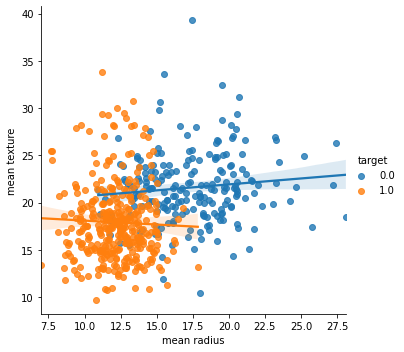

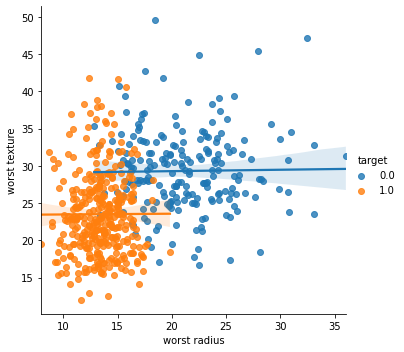

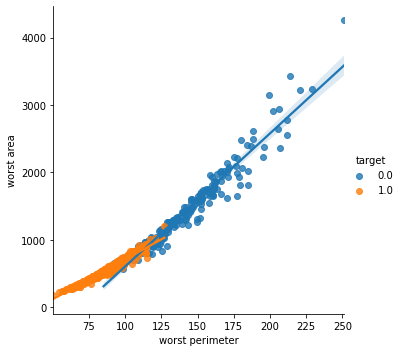

In [ ]:
# VISUALIZE DIFFERENT DISTRIBUTION OF FEATURES
import seaborn as sns;

g1 = sns.lmplot(x = "mean radius", y = "mean texture", hue = "target", data = df)
g2 = sns.lmplot(x = "worst radius", y = "worst texture", hue = "target", data = df)
g3 = sns.lmplot(x = "worst perimeter", y = "worst area", hue = "target", data = df)

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

 **ANSWER:
The scales in the plot of 'g' are not equal while in the plot of g_std are (as shown below). If the scales were to be equal in g, we would see all the data populate the bottom left corner of the graph because of the vastly different orders of magnitude in the x and y values of each data point.**

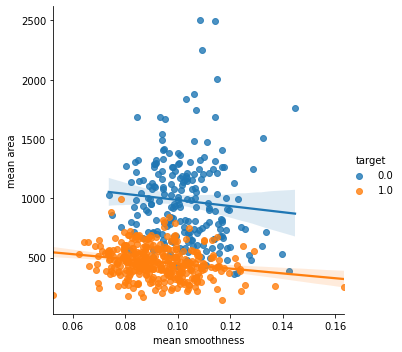

In [ ]:
# PLOT DISTRIBUTION OF UNSTANDARDIZED DATA
g = sns.lmplot(x = "mean smoothness", y = "mean area", hue = "target", data = df)

In [ ]:
# STANDARDIZE THE DATA
df_clean = df.copy() # deep copy the original data frame
mu = df_clean.mean()
si = df_clean.std()
df_clean -=mu
df_clean /= si
df_clean["target"] = df["target"] # remove effect of standardization on classes
df_clean

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0.0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0.0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0.0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0.0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,2.377491,2.601897,1.085429,0.191637,0.665416,2.065360,-1.137415,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,0.0
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,1.155840,1.290429,-0.423637,-0.069697,0.251980,0.807720,-0.188995,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,0.0
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,0.276450,0.180539,-0.379008,0.660696,0.510377,0.611619,-0.890632,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,0.0
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,1.437265,1.008615,-0.172848,2.015943,1.301140,0.785031,0.326346,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,0.0


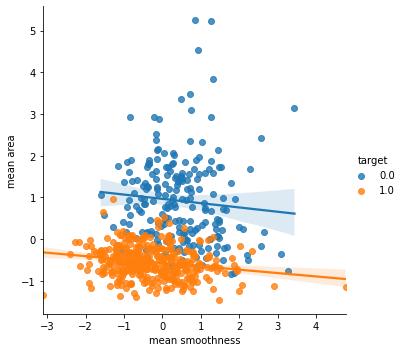

In [ ]:
# PLOT DISTRIBUTION OF STANDARDIZED DATA
g_std = sns.lmplot(x = "mean smoothness", y = "mean area", hue = "target", data = df_clean)


It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


K = np.zeros(100) # range of hyperparameters to test
MU = np.zeros(100) # range of mean cross-validation
SI = np.zeros(100) # range of cross-validation std

for k in range(1, 101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, cv = 5)
  K[k-1] = k
  MU[k-1] = scores.mean()
  SI[k-1] = scores.std()


(0.0, 100.0)

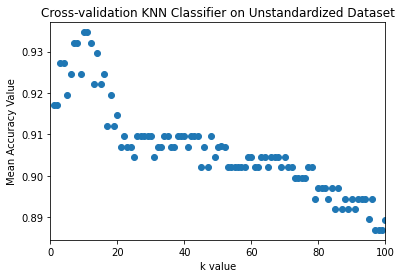

In [ ]:
# PLOT RESULTS
plt.scatter(K, MU)
plt.xlabel("k value")
plt.ylabel("Mean Accuracy Value")
plt.title("Cross-validation KNN Classifier on Unstandardized Dataset")
plt.xlim(0, 100)


2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**

 **ANSWER: The larger K values lead to underfitting the model, implying that we are considering a larger than necessary range of neighbouring data and ignoring the underlying trends of the dataset. Based on the scatter plots, the mean values drop roughly at k = 20. So k values larger than 20 are undesirable. On the other hand, the model is underfitting for very small values of k (K <= 5). 
The best k value is 10.**


Best k value is: 10.0


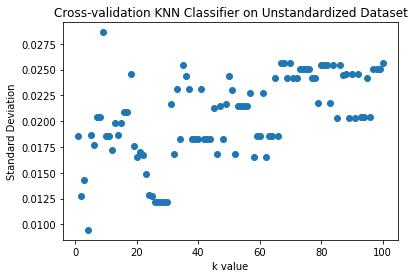

In [ ]:
plt.scatter(K, SI)
plt.xlabel("k value")
plt.ylabel("Standard Deviation")
plt.title("Cross-validation KNN Classifier on Unstandardized Dataset")

k_max = K[np.argmax(MU)]
print ("Best k value is:", k_max)

3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**

**ANSWER: I try removing features bewteen 'radius error' and 'area error' (columns 10 to 14) of the dataset and observe change in accuracy of the model compared to the results from the full dataset. It appears that removing the preimiter somewhat reduced the accuracy of the model, while removing the other features before it. This implies of the significance of that feature in training our model.**

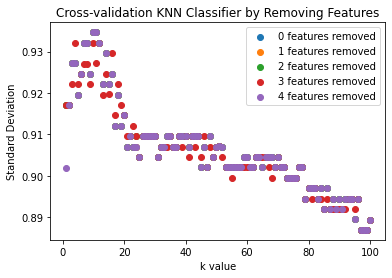

In [ ]:
MU_ = np.zeros((5, 100)) # range of mean cross-validation
SI_ = np.zeros((5, 100)) # range of cross-validation std
X_train_ = X_train.copy();

for i in range(0,5): # remove 5 features
  for k in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train_, y_train, cv = 5)
    MU_[i][k-1] = scores.mean()
    SI_[i][k-1] = scores.std()
    X_train_ = np.delete(X_train, i+10, 1)
  plt.scatter(K, MU_[i,:], label = '%s features removed' %(i))
  plt.xlabel("k value")
  plt.ylabel("Standard Deviation")
  plt.title("Cross-validation KNN Classifier by Removing Features")

plt.legend()
plt.show()

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**



In [ ]:
# STANDARDIZE TRAINING DATA
mu_x, si_x = X_train.mean(axis=0), X_train.std(axis=0)
X_train_std = (X_train - mu_x)/si_x

In [ ]:
# TRAIN a KNN CLASSIFIER WITH DIFFERENT K VALUES ON THE STANDARDIZED TRAINING DATASET
MU_std = np.zeros(100) # range of standardized mean cross-validation
SI_std = np.zeros(100) # range of standardized cross-validation std

MU_std[k-1] = scores.mean()
SI_std[k-1] = scores.std()

for k in range(1, 101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train_std, y_train, cv = 5)
  MU_std[k-1] = scores.mean()
  SI_std[k-1] = scores.std()

Best k value is: 10.0


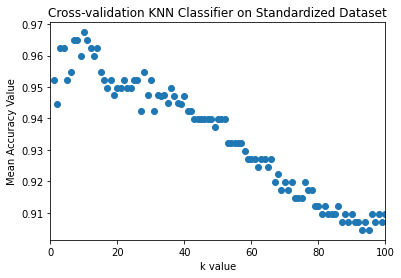

In [ ]:
# PLOT RESULTS
plt.scatter(K, MU_std)
plt.xlabel("k value")
plt.ylabel("Mean Accuracy Value")
plt.title("Cross-validation KNN Classifier on Standardized Dataset")
plt.xlim(0, 100)
k_max = K[np.argmax(MU_std)]
print ("Best k value is:", k_max)

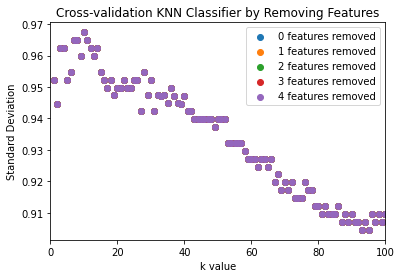

In [ ]:
# TRY REMOVING FEATURES
MU_std_ = np.zeros((5, 100)) # range of mean cross-validation
SI_std_ = np.zeros((5, 100)) # range of cross-validation std
X_train_std_ = X_train_std.copy();

for i in range(0,5): # remove 5 features
  for k in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train_std_, y_train, cv = 5)
    MU_std_[i][k-1] = scores.mean()
    SI_std_[i][k-1] = scores.std()
    X_train_ = np.delete(X_train_std_, i+10, 1)
  plt.scatter(K, MU_std_[i,:], label = '%s features removed' %(i))
  plt.xlabel("k value")
  plt.ylabel("Standard Deviation")
  plt.title("Cross-validation KNN Classifier by Removing Features")

plt.legend()
plt.xlim(0, 100)
plt.show()

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**
**ANSWER: The performance is definitely better. As you can see from the two comparable graphs, the best accuracy is close to 97% for the standardized data compared to the approxiamte 94% from the approxiamte data. In fact this is true for accuracy of all other k values in the standardized test with an improvement of at least 2% from the original dataset. However, the k value that gives the best accuracy remains 10, as we are still training the same data and the underlying assumptions made about the model by the classifier do not change.**

**Normalization of data in KNN classifier algorithm is important; the nearest neighbours are usually calculated using Euclidean distance, which would give us wrong results if the features have different units of measurement. Hence, the standardization results in the correct distances and a more confident model.**

In [ ]:
print("The highest accuracy for the standardized dataset is %.2f (+/-) %.2f " \
      % (np.max(MU_std), SI_std[np.argmax(MU_std)]*2), "with a k value of ", K[np.argmax(MU_std)])

print("The highest accuracy for the standardized dataset is %.2f (+/-) %.2f " \
      % (np.max(MU), SI[np.argmax(MU)]*2), "with a k value of ", K[np.argmax(MU)])

The highest accuracy for the standardized dataset is 0.97 (+/-) 0.04  with a k value of  10.0
The highest accuracy for the standardized dataset is 0.93 (+/-) 0.04  with a k value of  10.0


## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

**ANSWER: Our best training model is about 94% accurate with the test data, which was 30% of the original dataset. This is a good result, given our model has never seen this test dataset before. However, the accuracy is lower than the scaled training dataset, mainly because our model never trained on this data before.**

In [ ]:
from sklearn.metrics import accuracy_score
# SCALE THE TEST SET WITH TRAINING SET'S MEAN AND STD
X_test_std= (X_test - mu_x)/si_x

# APPLY BEST TRAINED MODEL TO SCALED TEST DATA
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 10)
scores_best = cross_val_score(knn, X_train_std_, y_train, cv = 5)
knn.fit(X_train_std_, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test_std))
print ("Test set accuracy: %.1f " %(accuracy * 100), "%")

Test set accuracy: 93.6  %


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

In [ ]:
def clear_all():
  """Clears all the variables from the workspace of the application.
  retrieved from https://eulertech.wordpress.com/2017/12/01/how-to-clear-all-in-python-spyder-workspace/
  """
  gl = globals().copy()
  for var in gl:
      if var[0] == '_': continue
      if 'func' in str(globals()[var]): continue
      if 'module' in str(globals()[var]): continue
  
  del globals()[var]
if __name__ == "__main__":
  clear_all()

In [ ]:
# UPLOAD GLASS CLASSIFICATION DATASET FROM LOCAL MACHINE
from google.colab import files
uploaded = files.upload()
""" Unzip the folder the folder named 'glass' and upload the excel file """
""" retrieved from https://www.kaggle.com/uciml/glass """

' retrieved from https://www.kaggle.com/uciml/glass '

In [ ]:
# IMPORT CSV FILE AS DATAFRAME
import pandas as pd

df = pd.read_csv('glass.csv')
df

# CONVERT DATAFRAME TO ARRAY format
dataset = df.to_numpy()
X = dataset[:,0:-1] # feature data
y = dataset[:,-1] # target data

In [ ]:
# STANDARDIZE TRAINING DATA
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

mu_x, si_x = X_train.mean(axis=0), X_train.std(axis=0)
X_train_std = (X_train - mu_x)/si_x

# TRAIN a KNN CLASSIFIER WITH DIFFERENT K VALUES ON THE STANDARDIZED TRAINING DATASET
K = np.zeros(100) # range of hyperparameters to test
MU_std = np.zeros(100) # range of standardized mean cross-validation
SI_std = np.zeros(100) # range of standardized cross-validation std

for k in range(1, 101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train_std, y_train, cv = 6)
  K[k-1] = k
  MU_std[k-1] = scores.mean()
  SI_std[k-1] = scores.std()

print("The highest accuracy for the standardized dataset is %.2f (+/-) %.2f " \
      % (np.max(MU_std), SI_std[np.argmax(MU_std)]*2), "with a k value of ", K[np.argmax(MU_std)])

The highest accuracy for the standardized dataset is 0.71 (+/-) 0.17  with a k value of  1.0


Best k value is: 1.0


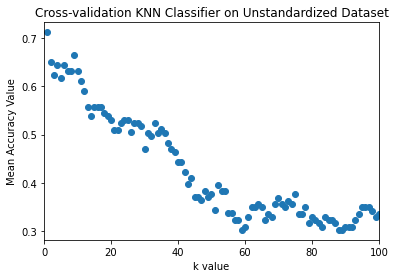

In [ ]:
# PLOT RESULTS
plt.scatter(K, MU_std)
plt.xlabel("k value")
plt.ylabel("Mean Accuracy Value")
plt.title("Cross-validation KNN Classifier on Unstandardized Dataset")
plt.xlim(0, 100)

k_max = K[np.argmax(MU_std)]
print ("Best k value is:", k_max)



In [ ]:
from sklearn.metrics import accuracy_score
# SCALE THE TEST SET WITH TRAINING SET'S MEAN AND STD
X_test_std= (X_test - mu_x)/si_x

# APPLY BEST TRAINED MODEL TO SCALED TEST DATA
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 1)
scores_best = cross_val_score(knn, X_train_std, y_train, cv = 5)
knn.fit(X_train_std, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test_std))
print ("Test set accuracy: %.1f " %(accuracy * 100), "%")

Test set accuracy: 33.8  %


**ANSWER: Based on trial-and-error for the number of folds in the cross-validation, the highest acheivable accuracy for the sandardized training dataset is 71% with a k value of 1 at 6 folds. The test set accuracy is about 34%. Based on these two results, the model is likely underfitting, and one way to solve this is to get more data in making our trained model more confident.**